In [2]:
import matplotlib.pyplot as plt
%matplotlib widget
import os
import scipy.io
import numpy as np
import random
from matplotlib.colors import ListedColormap
from scipy.stats import norm
from PIL import Image
from matplotlib.colors import Normalize
import h5py
import mplcursors
import cv2


In [6]:
# Function to load specific variable from a MATLAB file and convert it to a NumPy array
def load_and_store_variable(file_path, variable_name):
    try:
        # Load MATLAB file
        mat_data = scipy.io.loadmat(file_path)
        
        # Check if the specified variable exists in the file
        if variable_name not in mat_data:
            print(f"Variable '{variable_name}' not found in file: {file_path}")
            return None
        
        # Extract the specified variable
        variable_data = mat_data[variable_name][:,:,2]
        return variable_data.reshape((variable_data.shape[0], variable_data.shape[1], 1))
    except Exception as e:
        print(f"Error loading file: {file_path}")
        print(e)
        return None

# Specify the directory containing the MATLAB files
mat_directory = '/Users/lukas/Dokumente/Uni/SSI/CNN_data/'

# Specify the variable name
variable_name = 'TempC'

# Load and store the specified variable from each MATLAB file
numpy_data = []
mat_files = [file for file in os.listdir(mat_directory) if file.endswith('.mat')]
for file in mat_files:
    file_path = os.path.join(mat_directory, file)
    variable_data = load_and_store_variable(file_path, variable_name)
    
    # Check if variable_data is not None (i.e., loading was successful)
    if variable_data is not None:
        numpy_data.append(variable_data)

# Convert the list of arrays to a single NumPy array
numpy_data = np.array(numpy_data)

# Display the shape of the loaded array
print(f'Loaded array shape: {numpy_data.shape}')

# Now you can access individual arrays using numpy_data[index]
# Example: numpy_data[0]


Error loading file: /Users/lukas/Dokumente/Uni/SSI/CNN_data/TUBIN_IR1_20210923_121833_928_2.mat
Mat file appears to be empty
Loaded array shape: (59, 512, 640, 1)


In [4]:
import os
import scipy.io
import numpy as np

# Function to load specific variable from a MATLAB file and convert it to a NumPy array
def load_and_store_variable(file_path, variable_name):
    try:
        # Load MATLAB file
        mat_data = scipy.io.loadmat(file_path)
        
        # Check if the specified variable exists in the file
        if variable_name not in mat_data:
            print(f"Variable '{variable_name}' not found in file: {file_path}")
            return None
        
        # Extract the specified variable
        variable_data = mat_data[variable_name][:,:,0]
        return variable_data
    except Exception as e:
        print(f"Error loading file: {file_path}")
        print(e)
        return None

# Specify the directory containing the MATLAB files
mat_directory = '/Users/lukas/Dokumente/Uni/SSI/CNN_data/'

# Specify the variable name
variable_name = 'TempC'

# Load and store the specified variable from each MATLAB file
numpy_data = {}
mat_files = [file for file in os.listdir(mat_directory) if file.endswith('.mat')]
for file in mat_files:
    file_path = os.path.join(mat_directory, file)
    variable_data = load_and_store_variable(file_path, variable_name)
    
    # Check if variable_data is not None (i.e., loading was successful)
    if variable_data is not None:
        numpy_data[file[:-4] + '_' + variable_name + '0'] = variable_data

# Display loaded data keys and shapes
for key, value in numpy_data.items():
    print(f'{key}: {value.shape}')

# Now you can access individual arrays using the keys in the 'numpy_data' dictionary
# Example: numpy_data['filename_TempC']


Error loading file: /Users/lukas/Dokumente/Uni/SSI/CNN_data/TUBIN_IR1_20210923_121833_928_2.mat
Mat file appears to be empty
TUBIN_IR1_20210719_222948_776_2_TempC0: (512, 640)
TUBIN_IR2_20210727_173425_264_2_TempC0: (512, 640)
TUBIN_IR2_20211212_042016_192_2_TempC0: (512, 640)
TUBIN_IR1_20211212_041913_164_2_TempC0: (512, 640)
TUBIN_IR1_20210909_224132_992_2_TempC0: (512, 640)
TUBIN_IR2_20210831_093757_188_2_TempC0: (512, 640)
TUBIN_IR1_20210713_172830_328_2_TempC0: (512, 640)
TUBIN_IR2_20210831_224343_288_2_TempC0: (512, 640)
TUBIN_IR1_20210808_220724_304_2_TempC0: (512, 640)
TUBIN_IR1_20210713_172839_716_2_TempC0: (512, 640)
TUBIN_IR1_20211212_042002_140_2_TempC0: (512, 640)
TUBIN_IR2_20210803_132843_200_2_TempC0: (512, 640)
TUBIN_IR2_20210831_224431_336_2_TempC0: (512, 640)
TUBIN_IR2_20210831_093813_072_2_TempC0: (512, 640)
TUBIN_IR2_20211212_041859_188_2_TempC0: (512, 640)
TUBIN_IR1_20210830_225547_808_2_TempC0: (512, 640)
TUBIN_IR2_20210713_172839_848_2_TempC0: (512, 640)
TUBIN_IR

In [65]:
i

53

<function matplotlib.pyplot.show(block=None)>

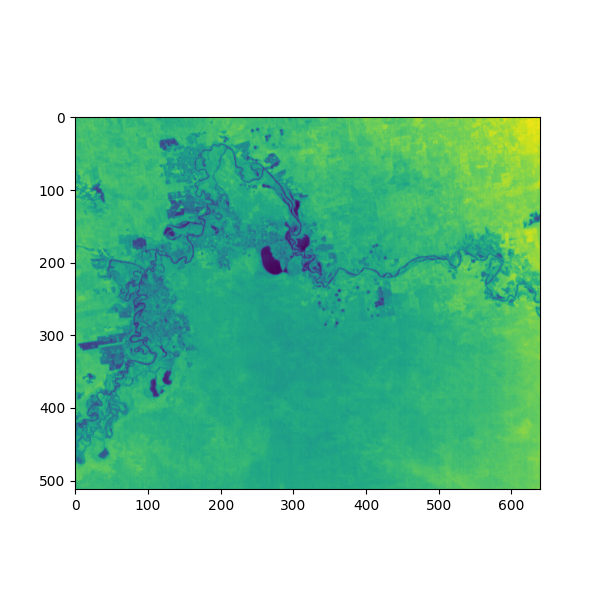

In [66]:
plt.close('all')


plt.figure(figsize=(6,6))

plt.imshow(numpy_data[53])

plt.show

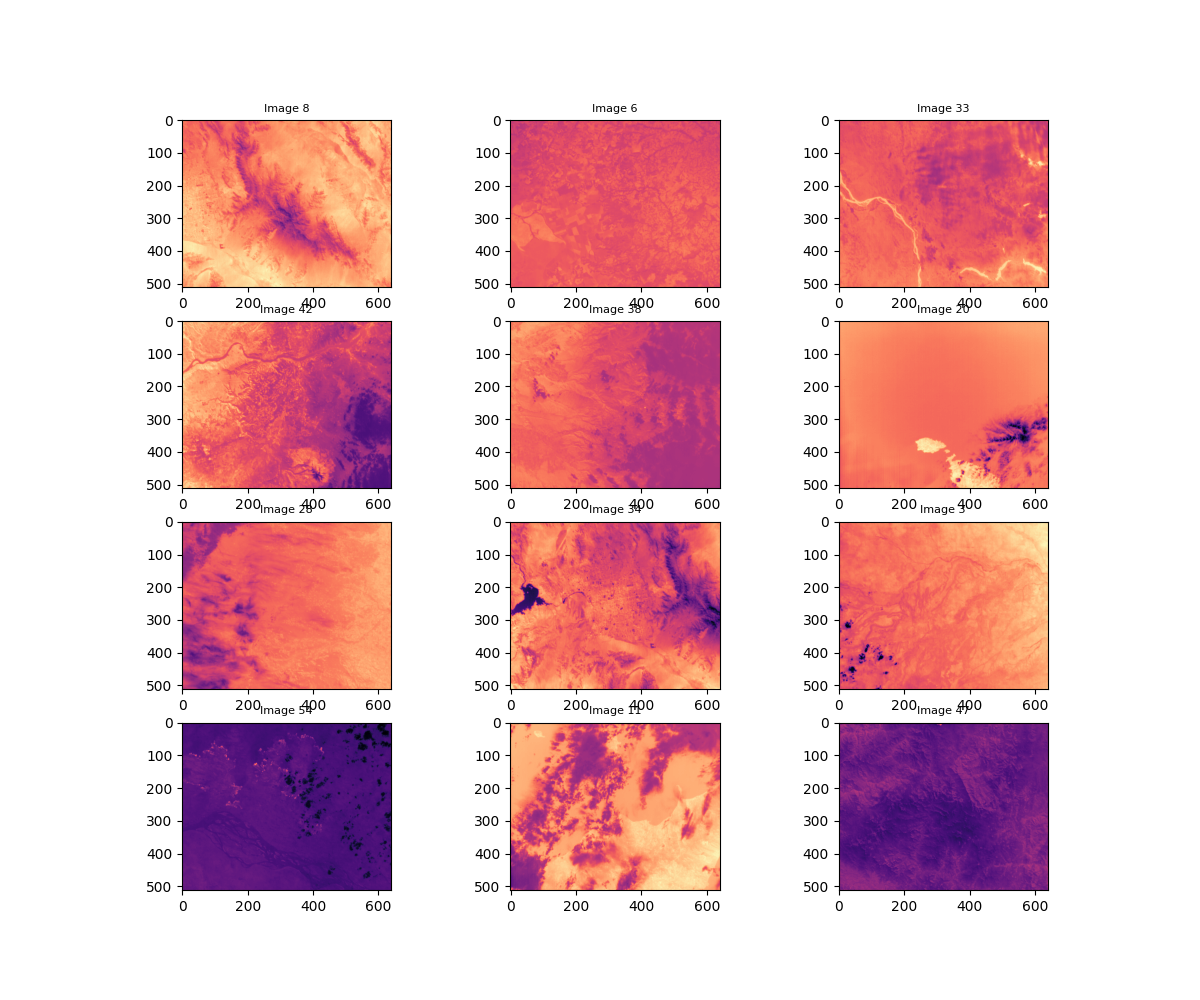

In [537]:
# Generate random indices to select four images
random_indices = random.sample(range(numpy_data.shape[0]), 12)

plt.close('all')
# Plot the selected images
fig, axes = plt.subplots(12//3, 3, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    index = random_indices[i]
    image = numpy_data[index, :, :, 0]
    ax.imshow(image, cmap='magma', vmin=np.min(image))  # You can change the cmap to suit your preference
    ax.set_title(f'Image {index}', fontsize=8)
    #ax.axis('off')

plt.show()

In [4]:


# Function to cut images into 128x128 sections
def cut_images(image_data, section_size):
    cut_frames = []

    for image in image_data:
        # Calculate the number of sections along each dimension
        num_rows = image.shape[0] // section_size
        num_cols = image.shape[1] // section_size

        # Cut the image into sections
        for i in range(num_rows):
            for j in range(num_cols):
                row_start, row_end = i * section_size, (i + 1) * section_size
                col_start, col_end = j * section_size, (j + 1) * section_size

                # Append the cut section to the list
                cut_frames.append(image[row_start:row_end, col_start:col_end, np.newaxis])

    return np.array(cut_frames)

# Cut images into 256x256 sections
section_size = 256
cut_frames = cut_images(numpy_data, section_size)

# Display the shape of the resulting cut frames
print(f'Cut frames shape: {cut_frames.shape}')


Cut frames shape: (236, 256, 256, 1, 1)


In [113]:
# Plot four random cut frames
fig, axes = plt.subplots(5, 3, figsize=(15, 25))

for i, ax in enumerate(axes.flat):
    index = random.randint(0, cut_frames.shape[0] - 1)
    cut_frame = cut_frames[index, :, :, 0]
    im = ax.imshow(cut_frame, cmap='viridis', vmin=np.min(cut_frame), vmax=np.max(cut_frame))  # You can change the cmap to suit your preference
    ax.set_title(f'Cut Frame {index}')
    #ax.colorbar()
    #ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)

plt.show()

NameError: name 'plt' is not defined

In [ ]:
['cloud', 'cirrus', 'water', 'shadow', 'land_mass', 'fire']
['cloud', 'no_cloud']

In [6]:
numpy_data[0].shape

(512, 640, 1)

In [452]:
def detect_cloud_pxl_thres(A, command = 'no', ct_force=99, water=[99,100], fire=45):

    # Extract matrices
    #data1['TempC'][:, :, 2]
    #AC = numpy_data[2]#data2['TempC'][:, :, 2]

    # Initialize matrices
    C1 = np.zeros_like(A)
    C2 = np.zeros_like(A)
    B1 = np.zeros_like(A)
    B2 = np.zeros_like(A)
    D = np.zeros_like(A)
    F = np.zeros_like(A)
    E = np.zeros_like(A)
    X = np.zeros_like(A)

    # Thresholds
    avg = np.mean(A)
    avgmin = np.mean(np.partition(A.flatten(), 500)[:500])
    avgmax = np.mean(np.partition(A.flatten(), -500)[-500:])
    dyn_range = avgmax - avgmin
    if ct_force == 99:
        est_ct = avg - 1.5 * np.std(A)

    # Define ct_max and ct2_max
    ct_max = 0
    ct2_max = 0.5

    # Cloud threshold value (in ∞C)
    if avg > 7 and avgmin < 1 and np.std(A.flatten()) > 2:
        ct_max = 5  # max cloud threshold value on warm images
        ct2_max = 5.5

    # Minimum cloud threshold value (mountain criterion)
    ct_min = -11

    # Cloud threshold in ∞C
    
    if ct_force != 99:
        ct = ct_force
    else:
        ct = max(min(est_ct, ct_max), ct_min)

    # Small threshold in ∞C
    ct2 = min(ct + 0.35 * np.std(A.flatten()), ct2_max)

    # Cloud candidate threshold in ∞C
    cct = ct + 0.55 * np.std(A.flatten())

    # Check for non-cloud images
    diff_std = ((np.size(np.where(A < avg - 1.64 * np.std(A))) / (np.size(A, 0) * np.size(A, 1)) - 0.05) * 100)
    diff_std2 = ((np.size(np.where(A > avg + 1.64 * np.std(A))) / (np.size(A, 0) * np.size(A, 1)) - 0.05) * 100)
    diff_std3 = ((np.size(np.where(A < avg - 1 * np.std(A))) / (np.size(A, 0) * np.size(A, 1)) - 0.1587) * 100)
    diff_std4 = ((np.size(np.where(A > avg + 1 * np.std(A))) / (np.size(A, 0) * np.size(A, 1)) - 0.1587) * 100)

    status = 1  # runs algorithm if conditions fit

    if abs(diff_std) < 1.5 and abs(diff_std2) < 1.5 and dyn_range < 25.5:
        status = 0  # no clouds present, algorithm is falsely

    if command == 'no_cloud':
        status = 0  # no clouds present, algorithm is falsely

    # Cloud detecting algorithm
    if status == 1:
        for i in range(np.size(A, 0)):
            for j in range(np.size(A, 1)):
                if A[i, j] < ct:
                    C1[i, j] = 1

        # Candidates around cloud pixels
        range_val = 2  # raster pixel range
        for r in range(range_val):  # checking candidates in different range settings
            nrv = (1 + 2 * r) ** 2  # number of values within the raster matrix

            for i in range(1 + r, np.size(A, 0) - r):
                for j in range(1 + r, np.size(A, 1) - r):
                    if A[i, j] < cct and C1[i, j] == 0:
                        lat = np.mean(np.mean(A[(i - r):(i + r), (j - r):(j + r)])) - 0.5  # local average threshold
                        if (nrv - np.size(np.where(C1[(i - r):(i + r), (j - r):(j + r)] == 0))) > 0 and (
                                A[i, j] < lat):
                            B1[i, j] = 2  # value chosen for better visualization, otherwise 1

        C1 = C1 + B1  # add confirmed candidates to the cloud matrix

        # Small Cloud Algorithm
        r = 2  # raster pixel range
        nrv = (1 + 2 * r) ** 2  # number of values within the raster matrix

        for i in range(1 + r, np.size(A, 0) - r):
            for j in range(1 + r, np.size(A, 1) - r):
                if A[i, j] < ct2 and C1[i, j] == 0:
                    lat = np.mean(np.mean(A[(i - r):(i + r), (j - r):(j + r)])) - 2  # local average threshold
                    if A[i, j] < lat:  # (nrv - np.size(np.where(C((i-r):(i+r),(j-r):(j+r))==0)) > 0) &
                        C2[i, j] = 3  # value chosen for better visualization, otherwise 1

        # Candidates around newly detected cloud pixels
        for i in range(1 + r, np.size(A, 0) - r):
            for j in range(1 + r, np.size(A, 1) - r):
                if A[i, j] < cct and C1[i, j] == 0 and C2[i, j] == 0:
                    lat = np.mean(np.mean(A[(i - r):(i + r), (j - r):(j + r)])) - 0.5  # local average threshold
                    if (nrv - np.size(np.where(C2[(i - r):(i + r), (j - r):(j + r)] == 0))) > 0 and (
                            A[i, j] < lat):  #
                        B2[i, j] = 4  # value chosen for better visualization, otherwise 1

        C2 = C2 + B2  # add confirmed candidates to the cloud matrix

        # Cloud map
        D = C1 + C2
        D[D>=1] = 1
        

    kernel = 5
    pxl_ext = kernel // 2

    if fire != 99:
        for i in range(pxl_ext,np.size(A, 0)-pxl_ext):
                for j in range(pxl_ext,np.size(A, 1)-pxl_ext):

                    std_water_th = 0.35
                    std_water = A[i-pxl_ext:i+pxl_ext, j-pxl_ext:j+pxl_ext].std()
                    water_diff = abs(A[i-pxl_ext:i+pxl_ext, j-pxl_ext:j+pxl_ext] - A[i, j])
                    water_diff_max = water_diff[np.argsort(water_diff)[-3:]].mean()
                    #print(std_water)
                    
                    if A[i, j] > fire:
                        F[i, j] = 1
                    if water[0] < A[i, j] < water[1] and std_water < std_water_th and water_diff_max < 2*std_water_th :
                        E[i, j] = 1
                        
    


    print(f'ct: {ct}')

    return - F + D + 2*E

In [64]:
cpm = detect_cloud_pxl_thres(numpy_data[-3], command = 'no_cloud')

54


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ct: -4.204158568706832


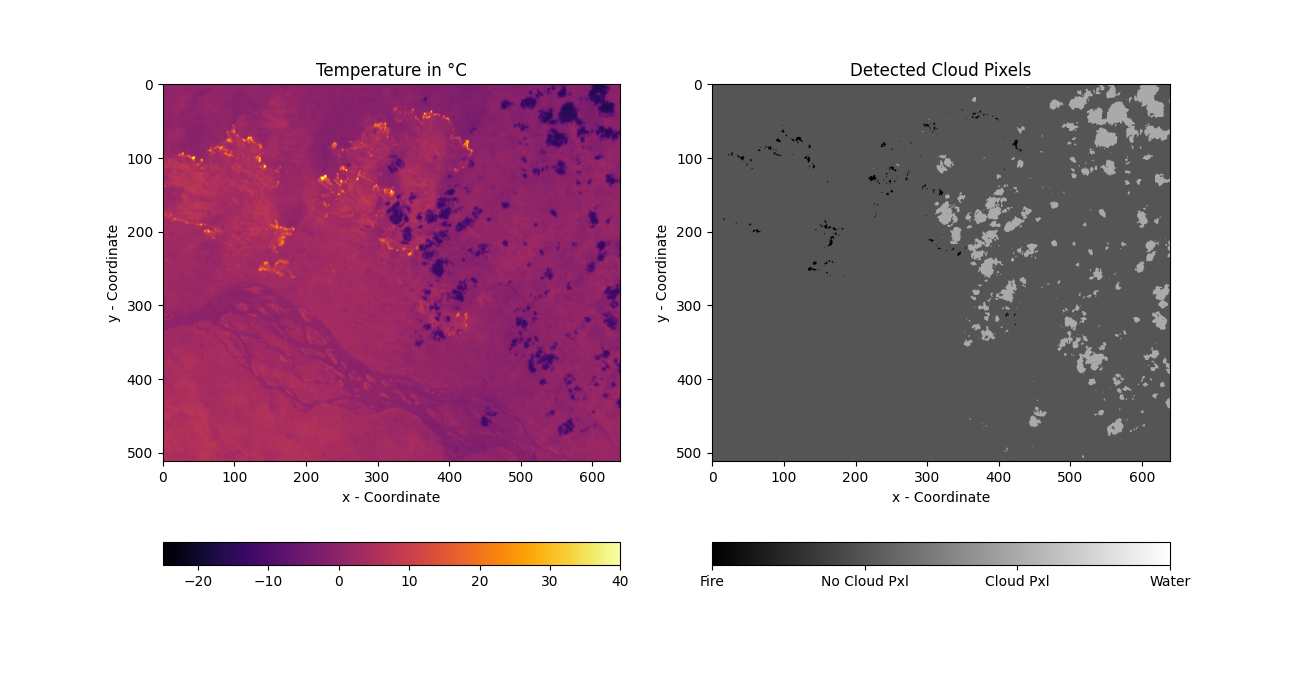

In [540]:
idx = 54
#idx += 1
print(idx)
img_plot = numpy_data[idx]
cpm = detect_cloud_pxl_thres(img_plot, command='no', ct_force=99, water=[74, 79], fire=15)

plt.close('all')
# Display images
plt.figure(figsize=(13, 7))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_plot, cmap='inferno', aspect='auto', vmin=-25, vmax=40)
plt.xlabel('x - Coordinate')
plt.ylabel('y - Coordinate')
plt.title('Temperature in °C')
plt.colorbar(orientation='horizontal')

# Detected Cloud Pixels
plt.subplot(1, 2, 2)
#cmap = ListedColormap(clrbr)
img = plt.imshow(cpm, cmap='binary_r', aspect='auto', vmin=-1, vmax=2)
plt.xlabel('x - Coordinate')
plt.ylabel('y - Coordinate')
plt.title('Detected Cloud Pixels')
#plt.colorbar(orientation='horizontal')
cbar = plt.colorbar(img, orientation='horizontal', ticks=[-1, 0, 1, 2])
cbar.set_ticklabels(['Fire', 'No Cloud Pxl', 'Cloud Pxl', 'Water'])

plt.show()

In [541]:
# Define the downsampling factor, for example, let's downsample by a factor of 2
downsampling_factor = 2

# Number of classes
num_classes = 4

# Path to save the HDF5 file
output_path = "/Users/lukas/Dokumente/Uni/SSI/CNN_data/cloudfirewater/high_res/IR1_with_label_" + str(idx) + ".h5"  # Include a file name in the path

# Resize the binary pixel map using OpenCV
# cpm_d2 = cv2.resize(cpm, (cpm.shape[0] // downsampling_factor, cpm.shape[1] // downsampling_factor), interpolation=cv2.INTER_AREA)
# cpm_d2[cpm_d2>=0.5] = 1
# cpm_d2[cpm_d2<0.5] = 0

# Resize the binary pixel map using OpenCV
# cpm_d2 = cv2.resize(cpm, (cpm.shape[0] // downsampling_factor, cpm.shape[1] // downsampling_factor), interpolation=cv2.INTER_AREA)
# cpm_d2[np.logical_and(-.5 <= cpm_d2, cpm_d2 < .5)] = 0
# cpm_d2[np.logical_and(.5 <= cpm_d2, cpm_d2 < 1.5)] = 1
# cpm_d2[1.5<cpm_d2] = 2
# cpm_d2[-.5>cpm_d2] = -1

#img_save = cv2.resize(img_plot, (cpm.shape[0] // downsampling_factor, cpm.shape[1] // downsampling_factor), interpolation=cv2.INTER_AREA)

# Apply one-hot encoding
one_hot_map = np.eye(num_classes)[cpm.astype(int).flatten()].reshape(cpm.astype(int).shape + (num_classes,))

# Save data to HDF5 file
with h5py.File(output_path, 'w') as file:
    file.create_dataset('image', data=img_plot)
    file.create_dataset('label_map', data=one_hot_map)

print(f'IR1_with_label_{idx}.h5')

IR1_with_label_54.h5


In [331]:
# Define the downsampling factor, for example, let's downsample by a factor of 2
downsampling_factor = 2

# Resize the binary pixel map using OpenCV
cpm_d2 = cv2.resize(cpm, (cpm.shape[0] // downsampling_factor, cpm.shape[1] // downsampling_factor), interpolation=cv2.INTER_AREA)
cpm_d2[np.logical_and(-.5 <= cpm_d2, cpm_d2 < .5)] = 0
cpm_d2[cpm_d2>0.5] = 1
cpm_d2[-.5>cpm_d2] = -1

In [260]:
def replace_map_section(map, bbox=[0,100,0,100], replace_with='no_cloud'):



    if replace_with == 'no_cloud':
        map[bbox[1]:bbox[3], bbox[0]:bbox[2]] = 0
    if replace_with == 'water':
        map[bbox[1]:bbox[3], bbox[0]:bbox[2]] = 2
    if replace_with == 'water_to_no_cloud':
        map[bbox[1]:bbox[3], bbox[0]:bbox[2]] = np.where(map[bbox[1]:bbox[3], bbox[0]:bbox[2]] == 2, 0, map[bbox[1]:bbox[3], bbox[0]:bbox[2]])
    if replace_with == 'cloud_to_water':
        map[bbox[1]:bbox[3], bbox[0]:bbox[2]] = np.where(map[bbox[1]:bbox[3], bbox[0]:bbox[2]] == 1, 2, map[bbox[1]:bbox[3], bbox[0]:bbox[2]])
        map[bbox[1]:bbox[3], bbox[0]:bbox[2]] = np.where(map[bbox[1]:bbox[3], bbox[0]:bbox[2]] == 3, 2, map[bbox[1]:bbox[3], bbox[0]:bbox[2]])
    if replace_with == 'remove_fire':
        map[bbox[1]:bbox[3], bbox[0]:bbox[2]] = np.where(map[bbox[1]:bbox[3], bbox[0]:bbox[2]] == -1, 0, map[bbox[1]:bbox[3], bbox[0]:bbox[2]])

    return map

In [324]:
cpm = replace_map_section(cpm, bbox=[305, 0, 640, 155], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[335, 0, 640, 184], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[433, 0, 640, 224], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[453, 0, 640, 315], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[500, 0, 580, 400], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[518, 0, 580, 413], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[530, 408, 568, 431], replace_with='water_to_no_cloud')

cpm = replace_map_section(cpm, bbox=[572, 445, 640, 512], replace_with='water')

print(idx)

57


In [316]:
cpm = replace_map_section(cpm, bbox=[0, 0, 330, 75], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[0, 0, 307, 145], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[0, 0, 262, 350], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[0, 0, 227, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[541, 383, 640, 512], replace_with='water')
print(idx)

56


In [508]:
cpm = replace_map_section(cpm, bbox=[380, 0, 640, 490], replace_with='no_cloud')
print(idx)

55


In [309]:
cpm = replace_map_section(cpm, bbox=[0, 0, 640, 268], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[285, 0, 640, 380], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[367, 375, 640, 420], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[525, 400, 640, 490], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[415, 400, 640, 430], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[480, 400, 640, 443], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[512, 400, 640, 475], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[560, 400, 640, 512], replace_with='water_to_no_cloud')
print(idx)

54


In [301]:
cpm = replace_map_section(cpm, bbox=[0, 0, 551, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[0, 0, 615, 111], replace_with='water_to_no_cloud')
print(idx)

51


In [93]:
cpm = replace_map_section(cpm, bbox=[200, 0, 545, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[0, 40, 200, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[570, 420, 640, 512], replace_with='water')
print(idx)

50


In [ ]:
cpm = replace_map_section(cpm, bbox=[0, 0, 435, 512], replace_with='no_cloud')
print(idx)

42


In [292]:
cpm = replace_map_section(cpm, bbox=[490, 400, 640, 512], replace_with='no_cloud')
#cpm = replace_map_section(cpm, bbox=[330, 0, 640, 512], replace_with='no_cloud')
print(idx)

49


In [ ]:
cpm = replace_map_section(cpm, bbox=[0, 0, 290, 512], replace_with='no_cloud')
cpm = replace_map_section(cpm, bbox=[330, 0, 640, 512], replace_with='no_cloud')
print(idx)

47


In [469]:
cpm = replace_map_section(cpm, bbox=[0, 0, 320, 350], replace_with='no_cloud')
cpm = replace_map_section(cpm, bbox=[0, 0, 255, 512], replace_with='no_cloud')
cpm = replace_map_section(cpm, bbox=[255, 390, 290, 512], replace_with='no_cloud')
#cpm = replace_map_section(cpm, bbox=[0, 0, 640, 225], replace_with='water')
print(idx)

40


In [ ]:
cpm = replace_map_section(cpm, bbox=[0, 0, 220, 220], replace_with='remove_fire')
#cpm = replace_map_section(cpm, bbox=[0, 0, 640, 225], replace_with='water')
print(idx)

38


In [455]:
cpm = replace_map_section(cpm, bbox=[200, 0, 640, 512], replace_with='water_to_no_cloud')
#cpm = replace_map_section(cpm, bbox=[0, 0, 640, 225], replace_with='water')
print(idx)

34


In [230]:
cpm = replace_map_section(cpm, bbox=[110, 98, 565, 400], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[460, 0, 555, 160], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[590, 200, 640, 260], replace_with='water_to_no_cloud')
print(idx)

27


In [213]:
cpm = replace_map_section(cpm, bbox=[122, 265, 262, 428], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[80, 0, 640, 170], replace_with='water')
cpm = replace_map_section(cpm, bbox=[450, 140, 640, 370], replace_with='water')
print(idx)

22


In [203]:
cpm = replace_map_section(cpm, bbox=[0, 0, 232, 512], replace_with='water')
cpm = replace_map_section(cpm, bbox=[0, 0, 640, 225], replace_with='water')
print(idx)

20


In [32]:
cpm = replace_map_section(cpm, bbox=[250, 250, 555, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[520, 410, 593, 482], replace_with='water_to_no_cloud')

In [184]:
cpm = replace_map_section(cpm, bbox=[115, 160, 350, 440], replace_with='cloud_to_water')
cpm = replace_map_section(cpm, bbox=[500, 400, 640, 512], replace_with='no_cloud')
print(idx)

17


In [163]:
cpm = replace_map_section(cpm, bbox=[250, 250, 555, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[500, 0, 640, 200], replace_with='water')
print(idx)

15


In [146]:
cpm = replace_map_section(cpm, bbox=[100, 413, 585, 512], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[285, 315, 615, 460], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[335, 280, 365, 315], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[520, 235, 640, 340], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[620, 180, 640, 250], replace_with='water_to_no_cloud')
cpm = replace_map_section(cpm, bbox=[490, 280, 640, 512], replace_with='water_to_no_cloud')
print(idx)

11


In [ ]:
cpm = replace_map_section(cpm, bbox=[0, 0, 555, 512], replace_with='no_cloud')
#cpm = replace_map_section(cpm, bbox=[520, 410, 593, 482], replace_with='water_to_no_cloud')
print(idx)

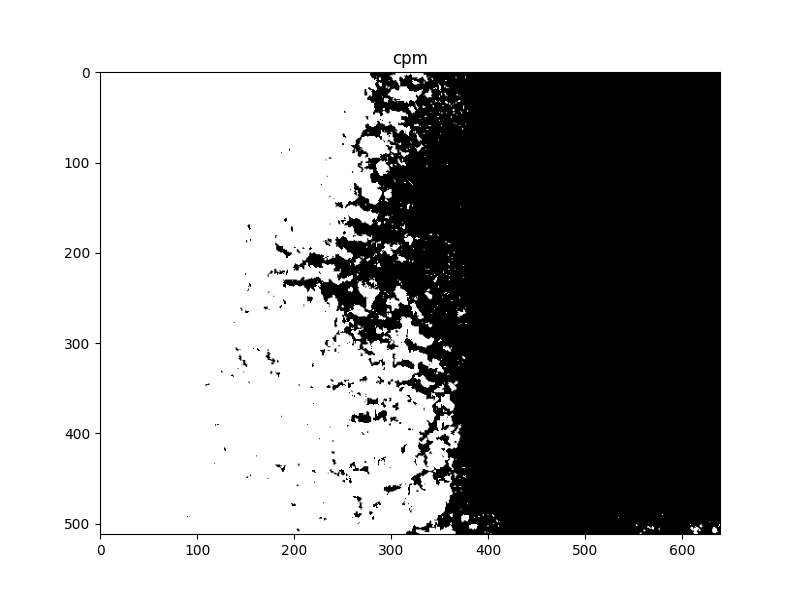

In [509]:
# Create a figure with two subplots side by side
#fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(10, 5))
plt.figure(figsize=(8,6))

# Plot the first image (cpm_d2) in the first subplot
plt.imshow(cpm, cmap='binary_r', aspect='auto')
plt.title('cpm')

# Plot the second image (cpm) in the second subplot
#ax2.imshow(cpm_d2, cmap='binary_r', aspect='auto')
#ax2.set_title('cpm_d2')

# Adjust layout for better spacing
#plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
530, 408, 568, 431

In [ ]:
cpm.astype(int)[0], cpm.shape

(array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],

In [214]:
# Number of classes
num_classes = 3

# Apply one-hot encoding
one_hot_map = np.eye(num_classes)[cpm_d2.astype(int).flatten()].reshape(cpm_d2.astype(int).shape + (num_classes,))

print("Original Map Shape:", cpm_d2.astype(int).shape)
print("One-Hot Encoded Map Shape:", one_hot_map.shape)

Original Map Shape: (320, 256)
One-Hot Encoded Map Shape: (320, 256, 3)


In [329]:
cpm[:30,:200] = 0

In [69]:
one_hot_map

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1.

In [36]:
#one_hot_map
one_hot_map[np.any(one_hot_map == np.array([0,0,1]), axis=(1, 2,))].shape

(320, 256, 3)